#Setores Censitarios

##Fontes

In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp

In [ ]:
!pip install folium

In [1]:
import pandas as pd
import geopandas as gpd

ModuleNotFoundError: ignored

In [2]:
import os
import zipfile
import shutil

In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR/TEMP'

In [3]:
os.name

'posix'

In [4]:
if not os.path.exists(dir):
  os.makedirs(dir)

TypeError: ignored

In [ ]:
filenames = []
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR/DADOS'):
  filenames = files

In [ ]:
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR'):
  print(dirs)

In [ ]:
#extraindo arquivos ZIPados, porém não funciona no drive
for item in filenames:
  zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR/DADOS/' + item,'r')
  zip_ref.extractall(dir)
  zip_ref.close()

In [ ]:
filenames[0][:-4]

'33045570507'

In [ ]:
lista_gdf = [gpd.read_file(dir + '/' + item[:-4]+'_setor.shp') for item in filenames]

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [ ]:
#Concatena tudo num GeoDF só
setor = pd.concat(lista_gdf, ignore_index=True)

In [ ]:
#Deleta o diretório temporário
shutil.rmtree(dir)

In [ ]:
type(setor)

geopandas.geodataframe.GeoDataFrame

In [ ]:
setor.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


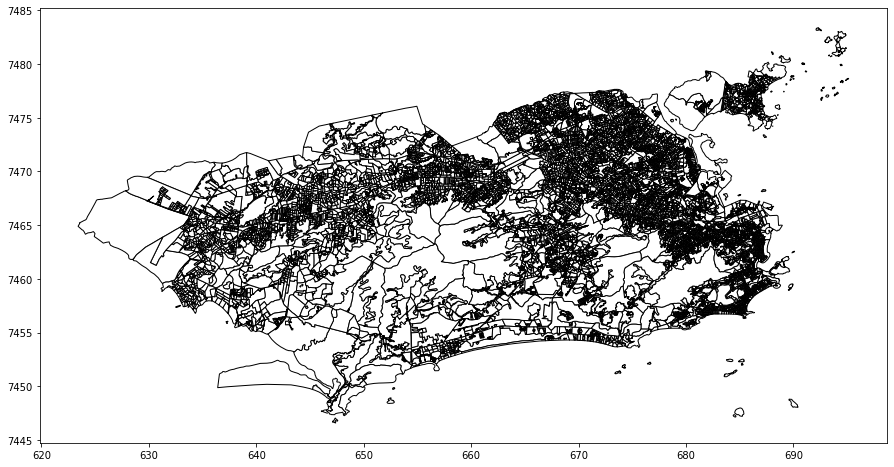

In [ ]:
setor.plot(color = 'white', edgecolor= 'black', figsize=(16,8))

In [ ]:
setor.to_file('/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR/RJ-SETOR.shp')

In [ ]:
botafogo = setor[setor[ 'NM_BAIRRO'] == 'Botafogo']

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


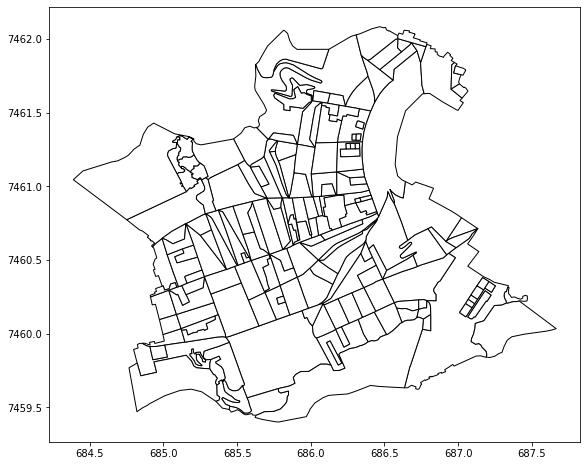

In [ ]:
botafogo.plot(color = 'white', edgecolor= 'black', figsize=(16,8))